In [1]:
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq
from scipy import signal
#https://kluedo.ub.uni-kl.de/frontdoor/deliver/index/docId/4293/file/exact_fft_measurements.pdf
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

In [2]:
df = pd.read_csv('Waveform Capture.csv.gz')
numberSamples = len(df)
minSampleTime = df['Timestamp'].min()
maxSampleTime = df['Timestamp'].max()
voltageData = df['CHANnel1 Data'].to_numpy()

In [3]:
#Rectangle Window
twosidedFFT = (1 / numberSamples) * abs(fft(voltageData))                                     
onesidedFFT  = 2 * twosidedFFT                                                              
powerFFT = onesidedFFT ** 2                                                                
powerFFTdBm = 10 * np.log10(10 * powerFFT)                                         

In [4]:
#Hanning Window, Needs +6 dBm 
voltageDataWindowed = signal.windows.hann(numberSamples) * voltageData                      
twosidedFFT = (1 / numberSamples) * abs(fft(voltageDataWindowed))
onesidedFFT  = 2 * twosidedFFT
powerFFT = onesidedFFT ** 2
powerFFTdBmWindowed = 10 * np.log10(10 * powerFFT)
powerFFTdBmWindowed[np.where(powerFFTdBmWindowed==np.max(powerFFTdBmWindowed))] += 6.02     #CPG Adjustment

In [5]:
#Create Dataframe of the FFT Data
fftFreq = fftfreq(numberSamples, (maxSampleTime - minSampleTime) / numberSamples) / 1E6
freqFrame = pd.DataFrame(fftFreq, columns = ['Frequency (MHz)'])
dbmFrame = pd.DataFrame(powerFFTdBmWindowed, columns = ['Power (dBm)'])
fftFrame = freqFrame.join(dbmFrame)
fftFrame = fftFrame.loc[fftFrame['Frequency (MHz)'] > 0]

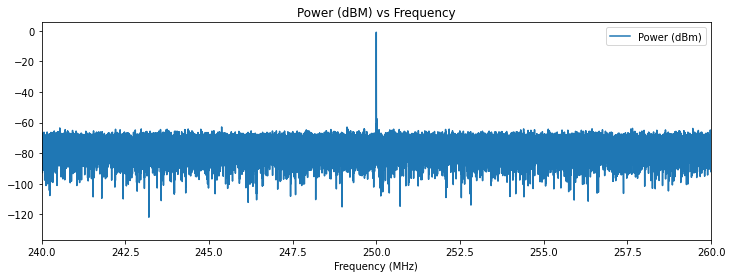

In [6]:
fftFrame.plot(x = 'Frequency (MHz)', y = 'Power (dBm)', title = 'Power (dBM) vs Frequency', figsize = (12,4), xlim = (240,260));  #Semicolon hides prints

In [ ]:
timeFrame = pd.DataFrame(sampleTimes, columns = ['Time (s)'])
voltFrame = pd.DataFrame(voltageData, columns = ['Voltage'])
waveFrame = timeFrame.join(voltFrame)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
waveFrame.plot(x = 'Time (s)', y = 'Voltage', title = 'Voltage vs Time', figsize = (12,4), xlim = (0, .00000001));  #Semicolon hides prints

print(f'{time.time() - startTime}')

In [7]:
peaks = signal.find_peaks(powerFFTdBmWindowed, height = -40)